In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

digits = datasets.load_digits()
labels = digits.target
images = digits.images

data = []

for idx, image in enumerate(images):
    image_uint8 = np.uint8(image)
    ret, thresh = cv2.threshold(image_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    img_moment = []

    for cnt in contours:
        M = cv2.moments(cnt)
        img_moment.extend(list(M.values()))

    data.append(img_moment)

max_length = max(len(item) for item in data)
data = [np.pad(seq, (0, max_length - len(seq)), 'constant') for seq in data]

df_data = pd.DataFrame(data)
df_data = df_data.astype('float32')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_data, digits.target, test_size=0.2, shuffle=False
)

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(max_length,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/100


c:\Users\xResK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.2933 - loss: 45.8421  
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.5222 - loss: 5.5414
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.6372 - loss: 3.1224
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6444 - loss: 2.8910
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.6444 - loss: 2.6883
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.6697 - loss: 2.1460
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.6950 - loss: 1.9774
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.7194 - loss: 1.4981
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.6691 - loss: 2.2387
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.7264 - loss: 1.7393
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.7133 - loss: 1.9400
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/s

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


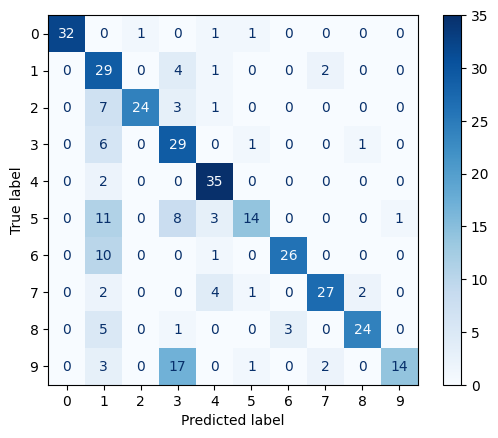

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [3]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('\nConfusion Matrix:\n', conf_matrix)
print('\nPrecision:', precision)
# print('\nRecall:', recall)
# print('\nF1-Score:', f1)
print("\nAccuracy: ", accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step

Confusion Matrix:
 [[32  0  1  0  1  1  0  0  0  0]
 [ 0 29  0  4  1  0  0  2  0  0]
 [ 0  7 24  3  1  0  0  0  0  0]
 [ 0  6  0 29  0  1  0  0  1  0]
 [ 0  2  0  0 35  0  0  0  0  0]
 [ 0 11  0  8  3 14  0  0  0  1]
 [ 0 10  0  0  1  0 26  0  0  0]
 [ 0  2  0  0  4  1  0 27  2  0]
 [ 0  5  0  1  0  0  3  0 24  0]
 [ 0  3  0 17  0  1  0  2  0 14]]

Precision: 0.7920842290921445

Accuracy:  0.7055555555555556


In [4]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

digits = datasets.load_digits()
labels = digits.target
images = digits.images

data = []

for idx, image in enumerate(images):
    image_uint8 = np.uint8(image)
    ret, thresh = cv2.threshold(image_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    img_Rect = []

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        img_Rect.extend([x, y, w, h])
    data.append(img_Rect)


max_length = max(len(item) for item in data)
data = [np.pad(seq, (0, max_length - len(seq)), 'constant') for seq in data]


df_data = pd.DataFrame(data)
df_data = df_data.astype('float32')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_data, digits.target, test_size=0.2, shuffle=False
)

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(max_length,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)



Epoch 1/100


c:\Users\xResK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.1687 - loss: 2.4128 
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.4239 - loss: 1.7508
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.4040 - loss: 1.6565
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.4734 - loss: 1.5644
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.4691 - loss: 1.5634
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.4369 - loss: 1.5526
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.4943 - loss: 1.4821
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.5025 - loss: 1.4770
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.4970 - loss: 1.4729
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.4686 - loss: 1.4958
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.5261 - loss: 1.4170
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/ste

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


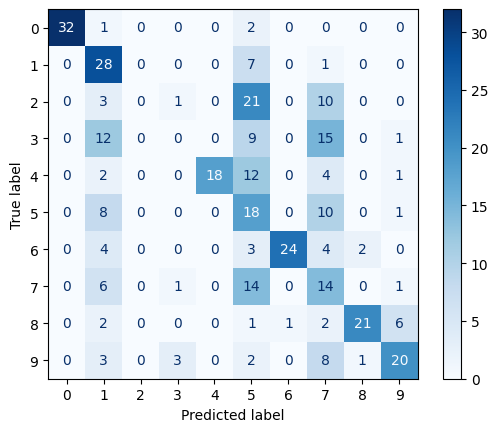

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [6]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('\nConfusion Matrix:\n', conf_matrix)
print('\nPrecision:', precision)
# print('\nRecall:', recall)
# print('\nF1-Score:', f1)
print("\nAccuracy: ", accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step

Confusion Matrix:
 [[32  1  0  0  0  2  0  0  0  0]
 [ 0 28  0  0  0  7  0  1  0  0]
 [ 0  3  0  1  0 21  0 10  0  0]
 [ 0 12  0  0  0  9  0 15  0  1]
 [ 0  2  0  0 18 12  0  4  0  1]
 [ 0  8  0  0  0 18  0 10  0  1]
 [ 0  4  0  0  0  3 24  4  2  0]
 [ 0  6  0  1  0 14  0 14  0  1]
 [ 0  2  0  0  0  1  1  2 21  6]
 [ 0  3  0  3  0  2  0  8  1 20]]

Precision: 0.5293479808114963

Accuracy:  0.4861111111111111


c:\Users\xResK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

digits = datasets.load_digits()
labels = digits.target
images = digits.images

data = []

moment_keys = [
    "m00", "m10", "m01", "m20", "m11", "m02", "m30", "m21", "m12", "m03",
    "mu20", "mu11", "mu02", "mu30", "mu21", "mu12", "mu03",
    "nu20", "nu11", "nu02", "nu30", "nu21", "nu12", "nu03"
]

for image in images:
    image_uint8 = np.uint8(image)
    ret, thresh = cv2.threshold(image_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_moment = []
    for cnt in contours:
        M = cv2.moments(cnt)
        img_moment.extend([M[key] for key in moment_keys])
        x, y, w, h = cv2.boundingRect(cnt)
        img_moment.extend([x, y, w, h])


    data.append(img_moment)

max_length = max(len(item) for item in data)
data = [np.pad(seq, (0, max_length - len(seq)), 'constant') for seq in data]

df_data = pd.DataFrame(data)
df_data = df_data.astype('float32')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_data, digits.target, test_size=0.2, shuffle=False
)

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(max_length,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


c:\Users\xResK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.1291 - loss: 99.2461  
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.4281 - loss: 8.9688
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.5116 - loss: 4.8156
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6169 - loss: 3.1017
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.6211 - loss: 2.7825
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.6278 - loss: 2.4869
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6538 - loss: 2.1001
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.6804 - loss: 1.9033
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6950 - loss: 1.5379
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.6912 - loss: 1.7938
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.7446 - loss: 1.4060
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/s

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


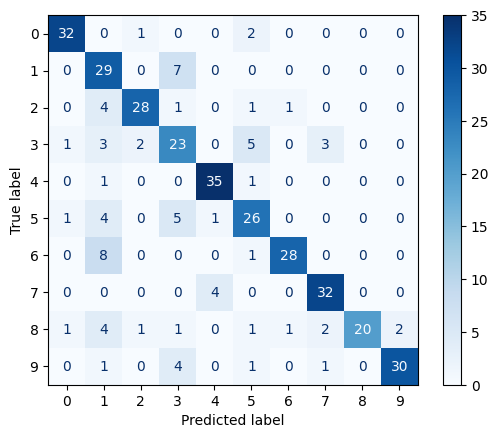

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [9]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('\nConfusion Matrix:\n', conf_matrix)
print('\nPrecision:', precision)
# print('\nRecall:', recall)
# print('\nF1-Score:', f1)
print("\nAccuracy: ", accuracy)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step

Confusion Matrix:
 [[32  0  1  0  0  2  0  0  0  0]
 [ 0 29  0  7  0  0  0  0  0  0]
 [ 0  4 28  1  0  1  1  0  0  0]
 [ 1  3  2 23  0  5  0  3  0  0]
 [ 0  1  0  0 35  1  0  0  0  0]
 [ 1  4  0  5  1 26  0  0  0  0]
 [ 0  8  0  0  0  1 28  0  0  0]
 [ 0  0  0  0  4  0  0 32  0  0]
 [ 1  4  1  1  0  1  1  2 20  2]
 [ 0  1  0  4  0  1  0  1  0 30]]

Precision: 0.8137273421528075

Accuracy:  0.7861111111111111
